<a href="https://colab.research.google.com/github/MekhzZ/SVM_Classifier_from_scratch/blob/main/SVM_Classifier_from_scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SVM_Classifier

in order to make **Support Vector Machine** from scratch, I made a steps to clear my views regarding process:



1.   importing dependencies
2.   making classifier object with needed functions
3.  fitting  features and target values
4.  gradient descent



hyperplane = mx +c

y = wx-b ,  where : w -> weight or input features , b -> bias value


*gradient descent*

if (Yi * (w.Xi -b))>=1

then dw = 2 * lambda * w  & db = 0

else dw = 2 * lambda * w - Xi*Yi & db = Yi

w = w - learning_rate * dw

b = b - learning_rate * db

## Import dependencies

In [2]:
import numpy as np

## Making SVM_Classifier


In [3]:
class SVM_Classifier():

  # initializing parameters

  def __init__(self, learning_rate, no_of_iterations, lambda_param): # self is for instance
    self.learning_rate = learning_rate
    self.no_of_iterations = no_of_iterations
    self.lambda_param = lambda_param

  # fit function

  def fit(self, X, Y):

    # m -> no of data points , n -> no of features
    self.m, self.n = X.shape

    # initializing weights and bias value with zeros

    self.w = np.zeros(self.n) # since its value is in array
    self.b = 0 # since b value is real number
    self.X = X
    self.Y = Y

    # starting gradient descent algorithm for optimization
    for i in range(self.no_of_iterations):
      self.update_weights()



  def update_weights(self):

    # label encoding
    y_label = np.where(self.Y <= 0, -1, 1) # since our dataset label is in binary 0,1 but model understand -1,1 for classification

    # gradient descent formula
    for index, x_i in enumerate(self.X):
      condition = y_label[index] * (np.dot(x_i, self.w) - self.b) >= 1 #formula from top note
      if (condition == True):
        dw = 2 * self.lambda_param * self.w # since dw = 2*lambda*w
        db = 0
      else:
        dw = 2 * self.lambda_param * self.w - np.dot(x_i, y_label[index]) # dw = 2*lambda*w - Xi * Yi
        db = y_label[index]

      self.w = self.w - self.learning_rate * dw # w = w - learning_rate * dw
      self.b = self.b - self.learning_rate * db # b = b - learning_rate * db


  def predict(self, X):
    output = np.dot(X, self.w) - self.b # y = w*x - b
    predicted_labels = np.sign(output) # since model classify by 1 or -1
    y = np.where(predicted_labels <= -1, 0, 1) # rearranging the output as output label
    return y

## Implementing SVM_Classifier

### Implementing dependencies

In [4]:
import pandas as pd # for using pandas DataFrame
from sklearn.preprocessing import StandardScaler # for standardizing data
from sklearn.model_selection import train_test_split # for splitting data
from sklearn.metrics import accuracy_score # for checking accuracy

### Data Collection and preprocessing


#### fetching dataset of diabetes from kaggle using kaggle api


In [5]:
!kaggle datasets download -d akshaydattatraykhare/diabetes-dataset

Dataset URL: https://www.kaggle.com/datasets/akshaydattatraykhare/diabetes-dataset
License(s): CC0-1.0
  0% 0.00/8.91k [00:00<?, ?B/s]
100% 8.91k/8.91k [00:00<00:00, 16.5MB/s]


'diabetes-dataset.zip" file is saved

In [6]:
from zipfile import ZipFile
dataset = '/content/diabetes-dataset.zip'

with ZipFile(dataset, 'r') as zip:
  zip.extractall()
  print('done')

done


"diabetes.csv" file is unzipped

#### data understanding

In [7]:
df = pd.read_csv('/content/diabetes.csv')

In [8]:
df.shape

(768, 9)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [10]:
df.Outcome.value_counts()

,count
Outcome,
0,500
1,268


In [11]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [12]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [13]:
df.describe().mean()

,0
Pregnancies,100.276829
Glucose,184.514644
BloodPressure,149.057659
SkinThickness,119.811084
Insulin,245.849185
BMI,121.359592
DiabetesPedigreeFunction,96.567963
Age,126.125140
Outcome,96.353239


In [14]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

selecting "input features" and "target value"

#### data preprocessing

In [15]:
features = df.drop(columns='Outcome', axis=1)
target = df['Outcome']

In [16]:
print(features)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  
0                       0.627   50  
1                       0.351   31  


In [17]:
print(target)

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64


In [18]:
scaler = StandardScaler()

In [19]:
scaler.fit(features)

StandardScaler()

In [20]:
std_features = scaler.transform(features)

In [21]:
print(std_features) # this will help model to analyze easily

[[ 0.63994726  0.84832379  0.14964075 ...  0.20401277  0.46849198
   1.4259954 ]
 [-0.84488505 -1.12339636 -0.16054575 ... -0.68442195 -0.36506078
  -0.19067191]
 [ 1.23388019  1.94372388 -0.26394125 ... -1.10325546  0.60439732
  -0.10558415]
 ...
 [ 0.3429808   0.00330087  0.14964075 ... -0.73518964 -0.68519336
  -0.27575966]
 [-0.84488505  0.1597866  -0.47073225 ... -0.24020459 -0.37110101
   1.17073215]
 [-0.84488505 -0.8730192   0.04624525 ... -0.20212881 -0.47378505
  -0.87137393]]


#### Training model

In [22]:
X_train, X_test, Y_train, Y_test = train_test_split(std_features, target, test_size=0.2, stratify=target, random_state=2)

In [23]:
print(std_features.shape, X_train.shape, X_test.shape) # 20% data for testing and 80% for training

(768, 8) (614, 8) (154, 8)


In [24]:
model = SVM_Classifier(learning_rate=0.001, no_of_iterations=1000, lambda_param=0.01)

In [25]:
model.fit(X_train, Y_train) # it will take a few minutes since our no_of_iterations is high

In [26]:
# accuracy testing for training data

X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(Y_train, X_train_prediction)

In [27]:
training_data_accuracy*100

78.66449511400651

In [28]:
# accuracy testing for testing data

X_test_prediction = model.predict(X_test)
testing_data_accuracy = accuracy_score(Y_test, X_test_prediction)

In [29]:
testing_data_accuracy*100

77.27272727272727

#### Building Predictive system

In [30]:
a = (6,148,72,35,0,33.6,0.627,50)

# changing the input_data to numpy array
a = np.asarray(a)

# reshape the array as we are predicting for one instance
a = a.reshape(1,-1)

# standardize the input data
a = scaler.transform(a)

prediction = model.predict(a)
print(prediction)

if (prediction[0] == 0):
  print('The person is not diabetic')
else:
  print('The person is diabetic')

[1]
The person is diabetic


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


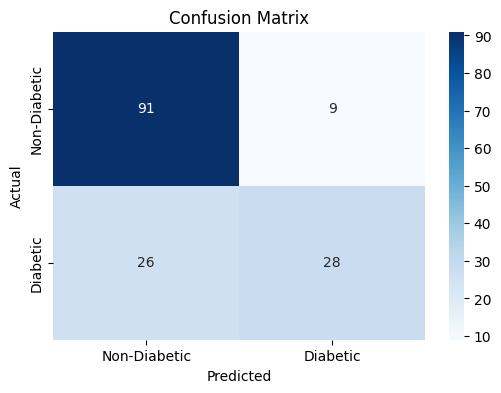

In [31]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# for test data visualization
y_true = Y_test  # Actual labels
y_pred = model.predict(X_test)  # Predicted labels

# Create the confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Non-Diabetic", "Diabetic"], yticklabels=["Non-Diabetic", "Diabetic"])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()


True Negatives (91): 91 individuals were correctly identified as non-diabetic.

False Positives (9): 9 non-diabetic individuals were incorrectly classified as diabetic.

False Negatives (26): 26 diabetic individuals were incorrectly classified as non-diabetic.

True Positives (28): 28 individuals were correctly identified as diabeti

The model does reasonably well at identifying non-diabetic individuals (91 correct predictions), but it struggles somewhat with diabetic individuals, as seen from the 26 false negatives.


The false negatives are important because in a medical context, failing to identify a diabetic person can have serious consequences.

I will reconsider more with my seniors and mentors on how to minimize false negative effectively.

saving model

In [32]:
import pickle
filename = 'diabetes_trained_model.sav'
pickle.dump(model, open(filename, 'wb'))